In [2]:
from LNN import *

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('fivethirtyeight')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)

# Mutual Info, Linear Stage

In [3]:
ns0 = np.arange(500)
ns1 = np.arange(500)
ns2 = np.arange(2, 500, 2)
ns3 = np.arange(3, 500, 3)
nsN = np.arange(1, 500, 1)

muts0 = np.zeros(ns0.shape)
muts1 = np.zeros(ns1.shape)
muts2 = np.zeros(ns2.shape)
muts3 = np.zeros(ns3.shape)
mutsN = np.zeros(nsN.shape)

fish0 = np.zeros(ns0.shape)
fish1 = np.zeros(ns1.shape)
fish2 = np.zeros(ns2.shape)
fish3 = np.zeros(ns3.shape)
fishN = np.zeros(nsN.shape)

fish_nl_0 = np.zeros(ns0.shape)
fish_nl_1 = np.zeros(ns1.shape)
fish_nl_2 = np.zeros(ns2.shape)
fish_nl_3 = np.zeros(ns3.shape)
fish_nl_N = np.zeros(nsN.shape)

In [6]:
for idx, n in enumerate(ns0):
    lnn = LNN(v = np.ones(n), w = np.zeros(n))
    muts0[idx] = lnn.MI_linear_stage()
    fish0[idx] = lnn.FI_linear_stage()
    fish_nl_0[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns1):
    lnn = LNN(v = np.ones(n), w = np.ones(n))
    muts1[idx] = lnn.MI_linear_stage()
    fish1[idx] = lnn.FI_linear_stage()
    fish_nl_1[idx] = lnn.FI_squared_nonlin(2)
    
for idx, n in enumerate(ns2):
    v = np.ones(n)
    w = np.concatenate((np.ones(int(n/2)), 2 * np.ones(int(n/2))))
    lnn = LNN(v = v, w = w)
    muts2[idx] = lnn.MI_linear_stage()
    fish2[idx] = lnn.FI_linear_stage()
    fish_nl_2[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns3):
    v = np.ones(n)
    w = np.concatenate((np.ones(int(n/3)), 2 * np.ones(int(n/3)), 3 * np.ones(int(n/3))))
    lnn = LNN(v = v, w = w)
    muts3[idx] = lnn.MI_linear_stage()
    fish3[idx] = lnn.FI_linear_stage()
    fish_nl_3[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(nsN):
    v = np.ones(n)
    w = np.arange(1, n+1)
    lnn = LNN(v = v, w = w)
    mutsN[idx] = lnn.MI_linear_stage()
    fishN[idx] = lnn.FI_linear_stage()
    fish_nl_N[idx] = lnn.FI_squared_nonlin(2)

Text(0,0.5,'Mutual Information')

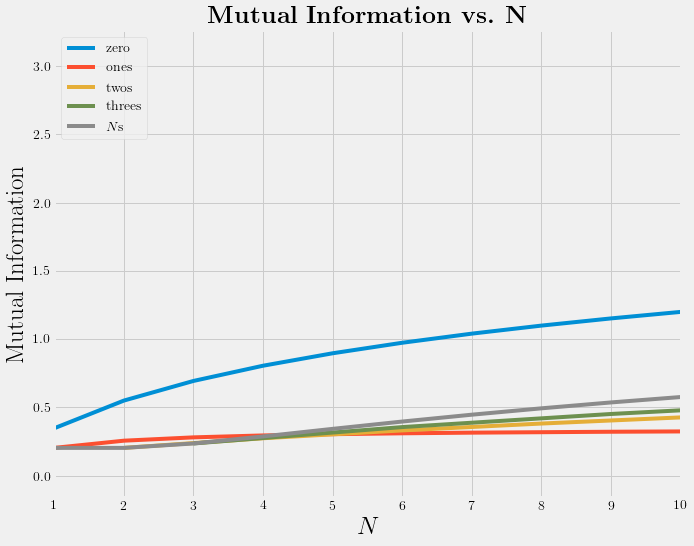

In [8]:
plt.figure(figsize = (10,8))
plt.plot(ns0, muts0, label = 'zero')
plt.plot(ns1, muts1, label = 'ones')
plt.plot(ns2, muts2, label = 'twos')
plt.plot(ns3, muts3, label = 'threes')
plt.plot(nsN, mutsN, label = r'$N$s')
plt.legend(loc = 2)
plt.title(r'\textbf{Mutual Information vs.} $\mathbf{N}$', fontsize = 25)
plt.xlim([1,10])
plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel('Mutual Information', fontsize = 25)
#plt.savefig('mutual_linear_stage.pdf')

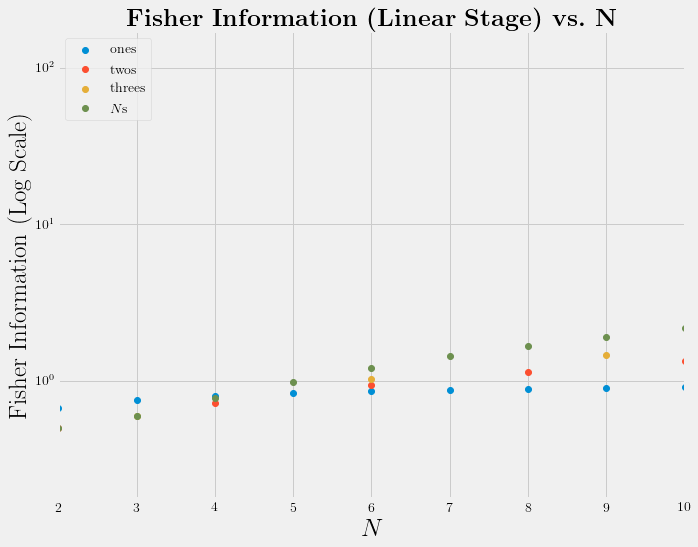

In [42]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish0, label = 'zero')
plt.scatter(ns1, fish1, label = 'ones', linewidth = 1)
plt.scatter(ns2, fish2, label = 'twos', linewidth = 1)
plt.scatter(ns3, fish3, label = 'threes', linewidth = 1)
plt.scatter(nsN, fishN, label = r'$N$s', linewidth = 1)
plt.legend(loc = 2)
plt.title(r'\textbf{Fisher Information (Linear Stage) vs.} $\mathbf{N}$', fontsize = 25)
plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel('Fisher Information (Log Scale)', fontsize = 25)
plt.xlim([2,10])
plt.yscale('log')
#plt.savefig('fisher_linear_stage.pdf')

# Unstructured Weights

In [3]:
N = 250
scales = np.arange(1., 10, 1)
repetitions = 1000
v = np.ones(N)
fishers = np.zeros((len(scales), repetitions))
muts = np.zeros(fishers.shape)
for scale_idx, scale in enumerate(scales):
    for rep in range(repetitions):
        w = 1 + LNN.unstruct_weight_maker(N, 'lognormal', loc = 0, scale = scale)
        lnn = LNN(v = v, w = w)
        FI_linear = lnn.FI_linear_stage()
        MI_linear = lnn.MI_linear_stage()
        fishers[scale_idx, rep] = FI_linear
        muts[scale_idx, rep] = MI_linear

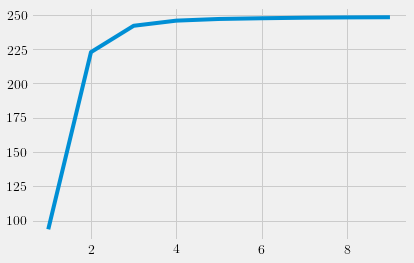

In [4]:
plt.plot(scales, np.mean(fishers, axis = 1))

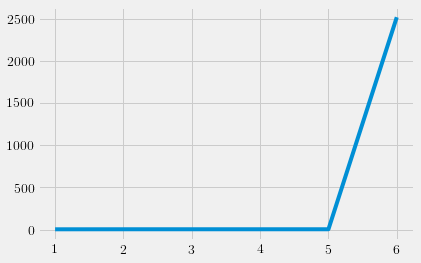

In [8]:
plt.plot(scales[:6], np.mean(muts, axis = 1)[:6])

In [7]:
muts.mean(axis  =1)

array([  2.76034896e+00,   3.20203160e+00,   3.24434009e+00,
         3.25209827e+00,   3.26214482e+00,   2.51683072e+03,
         1.45564292e+06,  -2.40240215e+09,  -5.00279945e+12])